In [1]:
import numpy as np
import pandas as pd

#### Accesing files within LearningQ.zip

In [2]:
ls

'Descriptive features-Copy3.ipynb'


In [3]:
cd ..

/mnt/seaweed/homes/do338/deep_question_generation/question_generation


In [4]:
ls

__init__.py   config/           data_preparation/
__pycache__/  data_extraction/  descriptives/


In [5]:
cd ..

/mnt/seaweed/homes/do338/deep_question_generation


In [6]:
ls

README.md  data/  question_generation/  tests/
VERSION    logs/  requirements.txt


In [8]:
cd data

/mnt/seaweed/homes/do338/deep_question_generation/data


In [9]:
ls

LearningQ.zip  LearningQdata.json  data/


In [10]:
import os

print('getcwd:      ', os.getcwd())

getcwd:       /mnt/seaweed/homes/do338/deep_question_generation/data


In [15]:
# import zipfile
# # Unzip folder (done now & stored in the Dissertation folder)...
# with zipfile.ZipFile('/mnt/seaweed/homes/do338/Dissertation/LearningQ.zip', 'r') as zip_ref:
#     zip_ref.extractall('/mnt/seaweed/homes/do338/Dissertation')

In [11]:
from zipfile import ZipFile

print('These are the paths where each .txt file are: ')
print()
with ZipFile('LearningQ.zip') as zf:
    paths = [path for path in zf.namelist() if 'data/experiments' in path and 'MACOSX' not in path and path.endswith('.txt')]
    for path in paths:
        print(path)

These are the paths where each .txt file are: 

LearningQ/data/experiments/teded/src-test.txt
LearningQ/data/experiments/teded/para-test.txt
LearningQ/data/experiments/teded/tgt-test.txt
LearningQ/data/experiments/khan/src-test.txt
LearningQ/data/experiments/khan/para-train.txt
LearningQ/data/experiments/khan/para-dev.txt
LearningQ/data/experiments/khan/tgt-dev.txt
LearningQ/data/experiments/khan/src-train.txt
LearningQ/data/experiments/khan/src-dev.txt
LearningQ/data/experiments/khan/para-test.txt
LearningQ/data/experiments/khan/tgt-test.txt
LearningQ/data/experiments/khan/tgt-train.txt


It contains: 
- para = source text..................in train/dev/test
- src  = source sentence............in train/dev/test
- tgt  = target question...............in train/dev/test


In [12]:
from zipfile import ZipFile

# accesing the .zip file
with ZipFile('LearningQ.zip') as zf:
    
    # screening each path, and selecting the path with my criteria (where the .txt files are) in the variable paths
    paths = [path for path in zf.namelist() if 'data/experiments' in path and path.endswith('.txt') and 'MACOSX' not in path]
    
    # accesing the data whithin each path
    # storing data in a suitable data structure
    data = {}
    for path in paths:
        source = 't-' if 'teded' in path else 'k-'
        file = path.split('/')[-1]
        file = file[:file.index('.')]
        file = source+file if file.endswith('test') else file
        print(file)
        with zf.open(path) as f:
            data[file] = f.read().decode().split('\n')

t-src-test
t-para-test
t-tgt-test
k-src-test
para-train
para-dev
tgt-dev
src-train
src-dev
k-para-test
k-tgt-test
tgt-train


In [16]:
data["para-train"][1]

"- [ voiceover ] the diode is our first semi-conductor device , and it 's a really important one . every other semi-conductor is basically made from combinations of diodes . and here 's a picture of a diode that you can buy . this is a , just a small little glass package , and that distance right there is about four millimeters . and inside here , right inside here , is a little silicon chip , and it 's manufactured to be a diode . so the question is , what is a diode ? a diode is something that conducts current in one direction , and does not conduct current in the other direction . and the symbol we use for a diode looks like this . it has this big arrow here , that points in the direction of the forward current . one way to understand how a diode works is to draw an iv curve for it . so let 's draw an iv curve for a diode . if it was a perfect diode , made in some unknown technology , what would happen is in the reverse direction , if the voltage across the diode was negative , we '

In [19]:
data["src-train"][1]

'so the question is , what is a diode ? a diode is something that conducts current in one direction , and does not conduct current in the other direction . and the symbol we use for a diode looks like this .'

In [20]:
data["tgt-train"][1]

'what is the direction of current in a circuit ( outside of a dc battery ) ?'

In [22]:
[print(i, key) for i, key in enumerate(data.keys())]

0 t-src-test
1 t-para-test
2 t-tgt-test
3 k-src-test
4 para-train
5 para-dev
6 tgt-dev
7 src-train
8 src-dev
9 k-para-test
10 k-tgt-test
11 tgt-train


[None, None, None, None, None, None, None, None, None, None, None, None]

In [8]:
for key in data.keys():
    print(data[key][-1])
    print('len ', key, len(data[key]))


len  t-src-test 7622

len  t-para-test 7622

len  t-tgt-test 7622

len  k-src-test 18228

len  para-train 188661

len  para-dev 20631

len  tgt-dev 20631

len  src-train 188661

len  src-dev 20631

len  k-para-test 18228

len  k-tgt-test 18228

len  tgt-train 188661


In [9]:
for key in data.keys():
    data[key].pop(-1)
    print('len ', key, len(data[key]))

# saving the clean database...
with open('LearningQdata.txt', 'w') as outfile:
    json.dump(data, outfile)

len  t-src-test 7621
len  t-para-test 7621
len  t-tgt-test 7621
len  k-src-test 18227
len  para-train 188660
len  para-dev 20630
len  tgt-dev 20630
len  src-train 188660
len  src-dev 20630
len  k-para-test 18227
len  k-tgt-test 18227
len  tgt-train 188660


In [10]:
print(data[key][-1])

when exactly did the communists fall ?


## Descriptive features

#### lenght of each subset train/dev/test (khan and teded)

In [11]:
# lenght of train set
m_para_train = len(data['para-train'])
m_src_train  = len(data['src-train'])
m_tgt_train  = len(data['tgt-train'])

# lenght of dev set
m_para_dev = len(data['para-dev'])
m_src_dev  = len(data['src-dev'])
m_tgt_dev  = len(data['tgt-dev'])

# lenght of test set: khan (k) and teded (t)
m_para_k_test = len(data['k-para-test'])
m_src_k_test  = len(data['k-src-test'])
m_tgt_k_test  = len(data['k-tgt-test'])

m_para_t_test = len(data['t-para-test'])
m_src_t_test  = len(data['t-src-test'])
m_tgt_t_test  = len(data['t-tgt-test'])

m_para_test = m_para_k_test + m_para_t_test
m_src_test  = m_src_k_test + m_src_t_test
m_tgt_test  = m_tgt_k_test  + m_tgt_t_test

# total rows (m) in each colum (n = paragraph/sentence/question)
m_para = m_para_train + m_para_dev + m_para_test
m_src  = m_src_train + m_src_dev + m_src_test
m_tgt  = m_tgt_train + m_tgt_dev + m_tgt_test

# proportion of train/dev/test (k, t)
prop_train = m_para_train / m_para
prop_dev   = m_para_dev / m_para
prop_k_test = m_para_k_test / m_para
prop_t_test = m_para_t_test / m_para
prop_test = prop_k_test + prop_t_test
prop_sets = prop_train + prop_dev + prop_test


print('Number of rows (m) in each set & each source (teded and khan):')
print()
print(f"{'SETS':<16}{'para':<12}{'sentence':<12}{'question':<12}{'proportion':<12}")
print()
print(f"{'train':<16}{m_para_train:<12}{m_src_train:<12}{m_tgt_train:<12}{'{:.3f}'.format(prop_train):<12}")
print(f"{'dev':<16}{m_para_dev:<12}{m_src_dev:<12}{m_tgt_dev:<12}{'{:.3f}'.format(prop_dev):<12}")
print(f"{'test':<16}{m_para_test:<12}{m_src_test:<12}{m_tgt_test:<12}{'{:.3f}'.format(prop_test):<12}")
print()
print(f"{'khan-test':<16}{m_para_k_test:<12}{m_src_k_test:<12}{m_src_k_test:<12}{'{:.3f}'.format(prop_k_test):<12}")
print(f"{'teded-test':<16}{m_para_t_test:<12}{m_src_t_test:<12}{m_tgt_t_test:<12}{'{:.3f}'.format(prop_t_test):<12}")
print()
print(f"{'total m':<16}{m_para:<12}{m_src:<12}{m_tgt:<12}{'{:.3f}'.format(prop_sets):<12}")

Number of rows (m) in each set & each source (teded and khan):

SETS            para        sentence    question    proportion  

train           188660      188660      188660      0.802       
dev             20630       20630       20630       0.088       
test            25848       25848       25848       0.110       

khan-test       18227       18227       18227       0.078       
teded-test      7621        7621        7621        0.032       

total m         235138      235138      235138      1.000       


## Basic statistics

- Unique documents (para)
- Unique questions (tgt)
- Average questions/documents
- nº of source sentences per question

#### Unique parragraphs 'para' in train/dev/test

In [12]:
# creating lists to apply np.unique function
para_train   = [value for value in data['para-train']]
para_dev     = [value for value in data['para-dev']]
para_k_test  = [value for value in data['k-para-test']]
para_t_test  = [value for value in data['t-para-test']]
para_test    = para_k_test + para_t_test

# Unique parragraphs in each list...
unique_para_train  = len(np.unique(para_train))
unique_para_dev    = len(np.unique(para_dev))
unique_para_test   = len(np.unique(para_test))
unique_para_t_test = len(np.unique(para_t_test))
unique_para_k_test = len(np.unique(para_k_test))

# proportions...
prop_unique_para_train  = unique_para_train  / m_para_train
prop_unique_para_dev    = unique_para_dev    / m_para_dev
prop_unique_para_test   = unique_para_test   / m_para_test
prop_unique_para_k_test = unique_para_k_test / m_para_k_test
prop_unique_para_t_test = unique_para_t_test / m_para_t_test

## totals...
unique_para = unique_para_train + unique_para_dev + unique_para_test
prop_unique_para = unique_para / m_para

print('Unique parragraphs (para) in each set (train/dev/test (t and k))')
print()
print(f"{'SET':<12}{'Unique':<12}{'Total':<12}{'Proportion':<12}")
print()
print(f"{'train':<12}{unique_para_train:<12}{m_para_train:<12}{'{:.3f}'.format(prop_unique_para_train):<12}")
print(f"{'dev':<12}{unique_para_dev:<12}{m_para_dev:<12}{'{:.3f}'.format(prop_unique_para_dev):<12}")
print(f"{'test':<12}{unique_para_test:<12}{m_para_test:<12}{'{:.3f}'.format(prop_unique_para_test):<12}")
print()
print(f"{'k-test':<12}{unique_para_k_test:<12}{m_para_k_test:<12}{'{:.3f}'.format(prop_unique_para_k_test):<12}")
print(f"{'t-test':<12}{unique_para_t_test:<12}{m_para_t_test:<12}{'{:.3f}'.format(prop_unique_para_t_test):<12}")
print()
print(f"{'total':<12}{unique_para:<12}{m_para:<12}{'{:.3f}'.format(prop_unique_para):<12}")

Unique parragraphs (para) in each set (train/dev/test (t and k))

SET         Unique      Total       Proportion  

train       7478        188660      0.040       
dev         1146        20630       0.056       
test        2217        25848       0.086       

k-test      1115        18227       0.061       
t-test      1102        7621        0.145       

total       10841       235138      0.046       


In [13]:
a = [1,2,3,4,4,5,6]
b = [4,5,9]

c = a + b

c == a + b

True

In [14]:
len(np.unique(c))

7

In [15]:
len(np.unique(a)) + len(np.unique(b))

9

In [16]:
len(para_k_test) + len(para_t_test)

25848

In [17]:
len(para_test)

25848

In [18]:
len(np.unique(para_test))

2217

In [19]:
len(np.unique(para_t_test)) + len(np.unique(para_k_test))

2217

In [20]:
m_para_test == m_para_k_test + m_para_t_test

True

In [21]:
unique_para_test == (unique_para_t_test + unique_para_k_test)

True

#### Unique questions 'tgt' in train/dev/test

In [22]:
# Unique tgt in each set...
tgt_train   = [value for value in data['tgt-train']]

tgt_dev     = [value for value in data['tgt-dev']]

tgt_k_test  = [value for value in data['k-tgt-test']]
tgt_t_test  = [value for value in data['t-tgt-test']]
tgt_test    = tgt_k_test + tgt_t_test

unique_tgt_train  = len(np.unique(tgt_train))
unique_tgt_dev    = len(np.unique(tgt_dev))
unique_tgt_test   = len(np.unique(tgt_test))
unique_tgt_t_test = len(np.unique(tgt_t_test))
unique_tgt_k_test = len(np.unique(tgt_k_test))

# proportions...
prop_unique_tgt_train = unique_tgt_train / m_tgt_train
prop_unique_tgt_dev   = unique_tgt_dev   / m_tgt_dev
prop_unique_tgt_test  = unique_tgt_test  / m_tgt_test
prop_unique_tgt_k_test = unique_tgt_k_test / m_tgt_k_test
prop_unique_tgt_t_test =  unique_tgt_t_test / m_tgt_t_test

## totals...
unique_tgt = unique_tgt_train + unique_tgt_dev + unique_tgt_test
prop_unique_tgt = unique_tgt / m_tgt

print('Unique target questions (tgt) in each set (train/dev/test (t and k))')
print()
print(f"{'SET':<12}{'Unique':<12}{'Total':<12}{'Proportion':<12}")
print()
print(f"{'train':<12}{unique_tgt_train:<12}{m_tgt_train:<12}{'{:.3f}'.format(prop_unique_tgt_train):<12}")
print(f"{'dev':<12}{unique_tgt_dev:<12}{m_tgt_dev:<12}{'{:.3f}'.format(prop_unique_tgt_dev):<12}")
print(f"{'test':<12}{unique_tgt_test:<12}{m_tgt_test:<12}{'{:.3f}'.format(prop_unique_tgt_test):<12}")
print()
print(f"{'k-test':<12}{unique_tgt_k_test:<12}{m_tgt_k_test:<12}{'{:.3f}'.format(prop_unique_tgt_k_test):<12}")
print(f"{'t-test':<12}{unique_tgt_t_test:<12}{m_tgt_t_test:<12}{'{:.3f}'.format(prop_unique_tgt_t_test):<12}")
print()
print(f"{'total':<12}{unique_tgt:<12}{m_tgt:<12}{'{:.3f}'.format(prop_unique_tgt):<12}")

Unique target questions (tgt) in each set (train/dev/test (t and k))

SET         Unique      Total       Proportion  

train       184871      188660      0.980       
dev         20333       20630       0.986       
test        25662       25848       0.993       

k-test      18050       18227       0.990       
t-test      7612        7621        0.999       

total       230866      235138      0.982       


#### Average Question / Document

This is all questions / unique documents

In [23]:
avg_tgt_para_train  = m_tgt_train  / unique_para_train
avg_tgt_para_dev    = m_tgt_dev    / unique_para_dev
avg_tgt_para_test   = m_tgt_test   / unique_para_test

avg_tgt_para_k_test = m_tgt_k_test / unique_para_k_test
avg_tgt_para_t_test = m_tgt_t_test / unique_para_t_test

avg_tgt_para  = m_tgt  / unique_para

print('Average question/unique document')
print()
print(f"{'SET':<12}{'tgt (all)':<12}{'para (uniq)':<16}{'average':<12}")
print()
print(f"{'train':<12}{m_tgt_train:<12}{unique_para_train:<16}{'{:.3f}'.format(avg_tgt_para_train):<12}")
print(f"{'dev':<12}{m_tgt_dev:<12}{unique_para_dev:<16}{'{:.3f}'.format(avg_tgt_para_dev):<12}")
print(f"{'test':<12}{m_tgt_test:<12}{unique_para_test:<16}{'{:.3f}'.format(avg_tgt_para_test):<12}")
print()
print(f"{'k-test':<12}{m_tgt_k_test:<12}{unique_para_k_test:<16}{'{:.3f}'.format(avg_tgt_para_k_test):<12}")
print(f"{'t-test':<12}{m_tgt_t_test:<12}{unique_para_t_test:<16}{'{:.3f}'.format(avg_tgt_para_t_test):<12}")
print()
print(f"{'total':<12}{m_tgt:<12}{unique_para:<16}{'{:.3f}'.format(avg_tgt_para):<12}")

Average question/unique document

SET         tgt (all)   para (uniq)     average     

train       188660      7478            25.229      
dev         20630       1146            18.002      
test        25848       2217            11.659      

k-test      18227       1115            16.347      
t-test      7621        1102            6.916       

total       235138      10841           21.690      


#### Number of source sentences per question

How many source sentences are in a quesion?

## Document & Question lenght

Counting workds that only contains alphabetical characters (includes numbers)
- avg. words/document
- avg. words/question
- avg. words per sentence of documents... HOW????

Counting sentences that...
- avg. sentence/doument
- avg. sentence/question

#### Average words per document (para) in train/dev/test (k and t) sets

In [24]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /homes/do338/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Exploring how to count words...

In [25]:
# Classical nltk method for counting words, but it includes caracters, so all the bother doesn't make sense!
text = nltk.Text(data['para-train'][0])
print(len(text) == len(data['para-train'][0]))


# The below piece of code created a dictionary with a key per word and the frequence of each word in the text.
# Useful, in general, but not efficient for this especific task (I just want to count words!)
import re
from collections import Counter

words = nltk.word_tokenize(data['para-train'][0])
text = words
nonPunct = re.compile('.*[A-Za-z0-9].*')  # must contain a letter or digit
filtered = [w for w in text if nonPunct.match(w)]
counts = Counter(filtered)

True


COUNTING WORDS:

First I tokenize each paragraph, then I loop through each paragraph of tokens filtering only alphanumeric characters. I just want to know how many words there is in a paragraph, I don't want to count characters, punctuation etc...
- Is there a way of doing this without filtering using a loop?

In [26]:
words = nltk.word_tokenize(data['para-train'][0])
# word.isalnum() creates a list containing each word in words that only contain alphanumeric characters.
new_words= [word for word in words if word.isalnum()]
len(new_words)

1438

#### Nº of Words in each para in train/dev/test

In [27]:
# initializing variables...
words_para_train  = 0
words_para_dev    = 0
words_para_k_test = 0
words_para_t_test = 0


# loop and count +=...
# train...
for m in range(m_para_train):
    words = nltk.word_tokenize(data['para-train'][m])
    words_para_train += len([word for word in words if word.isalnum()])
# dev...
for m in range(m_para_dev):
    words = nltk.word_tokenize(data['para-dev'][m])
    words_para_dev += len([word for word in words if word.isalnum()])
# test k and t...
for m in range(m_para_k_test):
    words = nltk.word_tokenize(data['k-para-test'][m])
    words_para_k_test += len([word for word in words if word.isalnum()])
for m in range(m_para_t_test):
    words = nltk.word_tokenize(data['t-para-test'][m])
    words_para_t_test += len([word for word in words if word.isalnum()])
words_para_test   = words_para_k_test + words_para_t_test

# average operation each set
avg_words_para_train  = words_para_train  / m_para_train
avg_words_para_dev    = words_para_dev    / m_para_dev
avg_words_para_k_test = words_para_k_test / m_para_k_test
avg_words_para_t_test = words_para_t_test / m_para_t_test
avg_words_para_test   = words_para_test   / m_para_test


# avg in the total dataset..
words_para     = words_para_train + words_para_dev + words_para_test
avg_words_para = words_para / m_para

print('Average words/document (para)')
print()
print(f"{'SET':<12}{'nº of words':<16}{'nº of para':<16}{'average':<12}")
print()
print(f"{'train':<12}{words_para_train:<16}{m_para_train:<16}{'{:.3f}'.format(avg_words_para_train):<12}")
print(f"{'dev':<12}{words_para_dev:<16}{m_para_dev:<16}{'{:.3f}'.format(avg_words_para_dev):<12}")
print(f"{'test':<12}{words_para_test:<16}{m_para_test:<16}{'{:.3f}'.format(avg_words_para_test):<12}")
print()
print(f"{'k-test':<12}{words_para_k_test:<16}{m_para_k_test:<16}{'{:.3f}'.format(avg_words_para_k_test):<12}")
print(f"{'t-test':<12}{words_para_t_test:<16}{m_para_t_test:<16}{'{:.3f}'.format(avg_words_para_t_test):<12}")
print()
print(f"{'total':<12}{words_para:<16}{m_para:<16}{'{:.3f}'.format(avg_words_para):<12}")

Average words/document (para)

SET         nº of words     nº of para      average     

train       270227035       188660          1432.349    
dev         25912854        20630           1256.076    
test        28864925        25848           1116.718    

k-test      23406191        18227           1284.149    
t-test      5458734         7621            716.275     

total       325004814       235138          1382.188    


#### Nº of words in each tgt train/dev/test

In [28]:
# initializing variables...
words_tgt_train  = 0
words_tgt_dev    = 0
words_tgt_k_test = 0
words_tgt_t_test = 0


# loop and count +=...
# train...
for m in range(m_tgt_train):
    words = nltk.word_tokenize(data['tgt-train'][m])
    words_tgt_train += len([word for word in words if word.isalnum()])
# dev...
for m in range(m_tgt_dev):
    words = nltk.word_tokenize(data['tgt-dev'][m])
    words_tgt_dev += len([word for word in words if word.isalnum()])
# test k and t...
for m in range(m_tgt_k_test):
    words = nltk.word_tokenize(data['k-tgt-test'][m])
    words_tgt_k_test += len([word for word in words if word.isalnum()])
for m in range(m_tgt_t_test):
    words = nltk.word_tokenize(data['t-tgt-test'][m])
    words_tgt_t_test += len([word for word in words if word.isalnum()])
words_tgt_test   = words_tgt_k_test + words_tgt_t_test

# average operation each set
avg_words_tgt_train  = words_tgt_train  / m_tgt_train
avg_words_tgt_dev    = words_tgt_dev    / m_tgt_dev
avg_words_tgt_k_test = words_tgt_k_test / m_tgt_k_test
avg_words_tgt_t_test = words_tgt_t_test / m_tgt_t_test
avg_words_tgt_test   = words_tgt_test   / m_tgt_test


# avg in the total dataset..
words_tgt = words_tgt_train + words_tgt_dev + words_tgt_test
avg_words_tgt = words_tgt / m_tgt

print('Average words/question (tgt)')
print()
print(f"{'SET':<12}{'nº of words':<12}{'nº of tgt':<16}{'average':<12}")
print()
print(f"{'train':<12}{words_tgt_train:<12}{m_tgt_train:<16}{'{:.3f}'.format(avg_words_tgt_train):<12}")
print(f"{'dev':<12}{words_tgt_dev:<12}{m_tgt_dev:<16}{'{:.3f}'.format(avg_words_tgt_dev):<12}")
print(f"{'test':<12}{words_tgt_test:<12}{m_tgt_test:<16}{'{:.3f}'.format(avg_words_tgt_test):<12}")
print()
print(f"{'k-test':<12}{words_tgt_k_test:<12}{m_tgt_k_test:<16}{'{:.3f}'.format(avg_words_tgt_k_test):<12}")
print(f"{'t-test':<12}{words_tgt_t_test:<12}{m_tgt_t_test:<16}{'{:.3f}'.format(avg_words_tgt_t_test):<12}")
print()
print(f"{'total':<12}{words_tgt:<12}{m_tgt:<16}{'{:.3f}'.format(avg_words_tgt):<12}")

Average words/question (tgt)

SET         nº of words nº of tgt       average     

train       2665158     188660          14.127      
dev         298359      20630           14.462      
test        398739      25848           15.426      

k-test      265321      18227           14.556      
t-test      133418      7621            17.507      

total       3362256     235138          14.299      


## POS and Entities

- counting how many POS there are in each subset of each document and tgt


    - pos_dict['para-train'][index]['POS'] = n times a POS happend
 
 
 - counting how many entities there are in each subset of each document and tgt
 
 
     - entit_dict['para-train'][index]['entity'] = n times an ent happend
     
     - ents_count[para-train][0] = x ents
     
     
  - Avg entities per documents
  - Avg entities per target question

In [1]:
import pandas as pd
import numpy as np
import json

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
# code to read a csv file 
descriptive_ = pd.read_csv('descriptive-features.csv')


with open('LearningQdata.txt') as json_file:
    data = json.load(json_file)

In [6]:
descriptive_

,set,m_para,m_src,m_tgt,prop_set,unique_para,prop_unique_para,unique_tgt,prop_unique_tgt,avg_tgt_para,words_para,avg_words_para,words_tgt,avg_words_tgt,ents_para,ents_tgt,avg_ents_para,avg_ents_tgt,prop_ents_words_para,prop_ents_words_tgt
0,train,188660,188660,188660,0.802337,7478,0.039637,184871,0.979916,25.228671,270227035,1432.349385,2665158,14.126778,12988838,56580,68.847864,0.299905,0.048066,0.021230
1,dev,20630,20630,20630,0.087736,1146,0.055550,20333,0.985603,18.001745,25912854,1256.076297,298359,14.462385,1213629,5856,58.828357,0.283858,0.046835,0.019627
2,test,25848,25848,25848,0.109927,2217,0.085771,25662,0.992804,11.658999,28864925,1116.717928,398739,15.426300,1308736,7235,50.632002,0.279906,0.045340,0.018145
3,k_test,18227,18227,18227,0.077516,1115,0.061173,18050,0.990289,16.347085,23406191,1284.149394,265321,14.556482,1099698,5254,60.333461,0.288254,0.046983,0.019802
4,t_test,7621,7621,7621,0.032411,1102,0.144600,7612,0.998819,6.915608,5458734,716.275292,133418,17.506626,209038,1981,27.429209,0.259940,0.038294,0.014848
5,all_sets,235138,235138,235138,1.000000,10841,0.046105,10841,0.981832,21.689697,325004814,1382.187541,3362256,14.299075,15511203,69671,65.966381,0.296298,0.047726,0.020722


In [3]:
from collections import defaultdict
import spacy
nlp = spacy.load("en_core_web_lg")

#### POS count

In [61]:
# unique_pos_dict['para-train'][index]['POS'] = n times a POS happend
unique_pos_dict = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: 0)))

for key in data.keys():
    if 'src' not in key:
        unique = np.unique(data[key])
        print(key, len(unique))
        for m in range(len(unique)):
            doc = nlp(unique[m].tolist())
            for token in doc:
                unique_pos_dict[key][m][token.pos_] += 1

# saving dictionaries
with open('unique-pos-dic-lg.txt', 'w') as outfile:
    json.dump(unique_pos_dict, outfile)

t-para-test 1102
t-tgt-test 7612
para-train 7478
para-dev 1146
tgt-dev 20333
k-para-test 1115
k-tgt-test 18050
tgt-train 184871


#### Ents count

In [4]:
# ALL DOCUMENTS
# entit_dict['para-train'][index]['entity'] = n times an ent happend
entit_dict = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: 0)))

for key in data.keys():
    if 'src' not in key:
        print(key)
        for m in range(len(data[key])):
            doc = nlp(data[key][m])
            for ent in doc.ents:
                entit_dict[key][m][ent.label_] += 1

# renaming dict
ents_dict = entit_dict

# saving dict
# with open('entities-dict-lg.txt', 'w') as outfile:
#     json.dump(ents_dict, outfile)

t-para-test
t-tgt-test
para-train
para-dev
tgt-dev
k-para-test
k-tgt-test
tgt-train


In [58]:
# UNIQUE DOCUMENTS
# entit_dict['para-train'][index]['entity'] = n times an ent happend
unique_entit_dict = defaultdict(lambda: defaultdict(lambda: defaultdict(lambda: 0)))

for key in data.keys():
    if 'src' not in key:
        unique = np.unique(data[key])
        print(key, len(unique))
        for m in range(len(unique)):
            doc = nlp(unique[m].tolist())
            for ent in doc.ents:
                unique_entit_dict[key][m][ent.label_] += 1

# renaming dict
unique_ents_dict = unique_entit_dict

# saving dict
with open('unique-entities-dict-lg.txt', 'w') as outfile:
    json.dump(unique_ents_dict, outfile)

t-para-test 1102
t-tgt-test 7612
para-train 7478
para-dev 1146
tgt-dev 20333
k-para-test 1115
k-tgt-test 18050
tgt-train 184871


In [62]:
unique_ents_count = defaultdict(lambda: defaultdict(lambda: 0)) # ents_count[para-train][0] = x ents

for key in data.keys():
    if 'src' not in key:
        unique = np.unique(data[key])
        print(key, len(unique))
        for m in range(len(unique)):
            doc = nlp(unique[m].tolist())
            unique_ents_count[key][m] = len(doc.ents)

# saving dict
with open('unique_ents-count-lg.txt', 'w') as outfile:
    json.dump(unique_ents_count, outfile)

t-para-test 1102
t-tgt-test 7612
para-train 7478
para-dev 1146
tgt-dev 20333
k-para-test 1115
k-tgt-test 18050
tgt-train 184871


In [59]:
unique_ents_dict

defaultdict(<function __main__.<lambda>()>,
            {'t-para-test': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {0: defaultdict(<function __main__.<lambda>.<locals>.<lambda>.<locals>.<lambda>()>,
                                      {'PERSON': 16,
                                       'GPE': 3,
                                       'ORDINAL': 1,
                                       'CARDINAL': 6,
                                       'LOC': 3,
                                       'MONEY': 1,
                                       'NORP': 5,
                                       'DATE': 6,
                                       'PRODUCT': 1,
                                       'ORG': 3}),
                          1: defaultdict(<function __main__.<lambda>.<locals>.<lambda>.<locals>.<lambda>()>,
                                      {'FAC': 2,
                                       'GPE': 1,
                                     

#### Average ententities per document

In [37]:
ents_para_train  = 0
ents_para_dev    = 0
ents_para_k_test = 0
ents_para_t_test = 0

# para...
for m in range(len(ents_dict['para-train'])):
    ents_para_train  += sum(ents_dict['para-train'][m].values())
# dev...
for m in range(len(ents_dict['para-dev'])):
    ents_para_dev    += sum(ents_dict['para-dev'][m].values())
# k-test...
for m in range(len(ents_dict['k-para-test'])):
    ents_para_k_test += sum(ents_dict['k-para-test'][m].values())
# t-test...
for m in range(len(ents_dict['t-para-test'])):
    ents_para_t_test += sum(ents_dict['t-para-test'][m].values())
ents_para_test = ents_para_k_test + ents_para_t_test

# average operation each set
avg_ents_para_train  = ents_para_train  / m_para_train
avg_ents_para_dev    = ents_para_dev    / m_para_dev
avg_ents_para_k_test = ents_para_k_test / m_para_k_test
avg_ents_para_t_test = ents_para_t_test / m_para_t_test
avg_ents_para_test   = ents_para_test   / m_para_test


# avg in the total dataset..
ents_para     = ents_para_train + ents_para_dev + ents_para_test
avg_ents_para = ents_para / m_para

print('Average ents/document (para)')
print()
print(f"{'SET':<12}{'nº of ents':<16}{'nº of para':<16}{'average':<12}")
print()
print(f"{'train':<12}{ents_para_train:<16}{m_para_train:<16}{'{:.3f}'.format(avg_ents_para_train):<12}")
print(f"{'dev':<12}{ents_para_dev:<16}{m_para_dev:<16}{'{:.3f}'.format(avg_ents_para_dev):<12}")
print(f"{'test':<12}{ents_para_test:<16}{m_para_test:<16}{'{:.3f}'.format(avg_ents_para_test):<12}")
print()
print(f"{'k-test':<12}{ents_para_k_test:<16}{m_para_k_test:<16}{'{:.3f}'.format(avg_ents_para_k_test):<12}")
print(f"{'t-test':<12}{ents_para_t_test:<16}{m_para_t_test:<16}{'{:.3f}'.format(avg_ents_para_t_test):<12}")
print()
print(f"{'total':<12}{ents_para:<16}{m_para:<16}{'{:.3f}'.format(avg_ents_para):<12}")

Average ents/document (para)

SET         nº of ents      nº of para      average     

train       12988838        188660          68.848      
dev         1213629         20630           58.828      
test        1308736         25848           50.632      

k-test      1099698         18227           60.333      
t-test      209038          7621            27.429      

total       15511203        235138          65.966      


#### Average entities per target question

In [38]:
ents_tgt_train  = 0
ents_tgt_dev    = 0
ents_tgt_k_test = 0
ents_tgt_t_test = 0

# para...
for m in range(len(ents_dict['tgt-train'])):
    ents_tgt_train  += sum(ents_dict['tgt-train'][m].values())
# dev...
for m in range(len(ents_dict['tgt-dev'])):
    ents_tgt_dev    += sum(ents_dict['tgt-dev'][m].values())
# k-test...
for m in range(len(ents_dict['k-tgt-test'])):
    ents_tgt_k_test += sum(ents_dict['k-tgt-test'][m].values())
# t-test...
for m in range(len(ents_dict['t-tgt-test'])):
    ents_tgt_t_test += sum(ents_dict['t-tgt-test'][m].values())
ents_tgt_test = ents_tgt_k_test + ents_tgt_t_test

# average operation each set
avg_ents_tgt_train  = ents_tgt_train  / m_tgt_train
avg_ents_tgt_dev    = ents_tgt_dev    / m_tgt_dev
avg_ents_tgt_k_test = ents_tgt_k_test / m_tgt_k_test
avg_ents_tgt_t_test = ents_tgt_t_test / m_tgt_t_test
avg_ents_tgt_test   = ents_tgt_test   / m_tgt_test


# avg in the total dataset..
ents_tgt     = ents_tgt_train + ents_tgt_dev + ents_tgt_test
avg_ents_tgt = ents_tgt / m_tgt

print('Average ents/question (tgt)')
print()
print(f"{'SET':<12}{'nº of ents':<16}{'nº of tgt':<16}{'average':<12}")
print()
print(f"{'train':<12}{ents_tgt_train:<16}{m_tgt_train:<16}{'{:.3f}'.format(avg_ents_tgt_train):<12}")
print(f"{'dev':<12}{ents_tgt_dev:<16}{m_tgt_dev:<16}{'{:.3f}'.format(avg_ents_tgt_dev):<12}")
print(f"{'test':<12}{ents_tgt_test:<16}{m_tgt_test:<16}{'{:.3f}'.format(avg_ents_tgt_test):<12}")
print()
print(f"{'k-test':<12}{ents_tgt_k_test:<16}{m_tgt_k_test:<16}{'{:.3f}'.format(avg_ents_tgt_k_test):<12}")
print(f"{'t-test':<12}{ents_tgt_t_test:<16}{m_tgt_t_test:<16}{'{:.3f}'.format(avg_ents_tgt_t_test):<12}")
print()
print(f"{'total':<12}{ents_tgt:<16}{m_tgt:<16}{'{:.3f}'.format(avg_ents_tgt):<12}")

Average ents/question (tgt)

SET         nº of ents      nº of tgt       average     

train       56580           188660          0.300       
dev         5856            20630           0.284       
test        7235            25848           0.280       

k-test      5254            18227           0.288       
t-test      1981            7621            0.260       

total       69671           235138          0.296       


### Saving restuls

In [39]:
import pandas as pd
import json

In [40]:
# creating a dic with the stats (except POS and entities)
descriptive = {
    'set': ['train', 'dev', 'test', 'k_test', 't_test', 'all_sets'],
    'm_para': [m_para_train, m_para_dev, m_para_test, m_para_k_test, m_para_t_test, m_para],
    'm_src': [m_src_train, m_src_dev, m_src_test, m_src_k_test, m_src_t_test, m_src],
    'm_tgt':  [m_tgt_train, m_tgt_dev, m_tgt_test, m_tgt_k_test, m_tgt_t_test, m_tgt],
    'prop_set': [prop_train, prop_dev, prop_test, prop_k_test, prop_t_test, prop_sets],
    'unique_para': [unique_para_train, unique_para_dev, unique_para_test, unique_para_k_test, unique_para_t_test, unique_para],
    'prop_unique_para': [prop_unique_para_train, prop_unique_para_dev, prop_unique_para_test, prop_unique_para_k_test, prop_unique_para_t_test, prop_unique_para],
    'unique_tgt':  [unique_tgt_train, unique_tgt_dev, unique_tgt_test, unique_tgt_k_test, unique_tgt_t_test, unique_para],
    'prop_unique_tgt':  [prop_unique_tgt_train, prop_unique_tgt_dev, prop_unique_tgt_test, prop_unique_tgt_k_test, prop_unique_tgt_t_test, prop_unique_tgt],
    'avg_tgt_para': [avg_tgt_para_train, avg_tgt_para_dev, avg_tgt_para_test, avg_tgt_para_k_test, avg_tgt_para_t_test, avg_tgt_para],
    'words_para': [words_para_train, words_para_dev, words_para_test, words_para_k_test, words_para_t_test, words_para],
    'avg_words_para': [avg_words_para_train, avg_words_para_dev, avg_words_para_test, avg_words_para_k_test, avg_words_para_t_test, avg_words_para],
    'words_tgt': [words_tgt_train, words_tgt_dev, words_tgt_test, words_tgt_k_test, words_tgt_t_test, words_tgt],
    'avg_words_tgt': [avg_words_tgt_train, avg_words_tgt_dev, avg_words_tgt_test, avg_words_tgt_k_test, avg_words_tgt_t_test, avg_words_tgt],
    'ents_para': [ents_para_train, ents_para_dev, ents_para_test, ents_para_k_test, ents_para_t_test, ents_para],
    'ents_tgt': [ents_tgt_train, ents_tgt_dev, ents_tgt_test, ents_tgt_k_test, ents_tgt_t_test, ents_tgt],
    'avg_ents_para': [avg_ents_para_train, avg_ents_para_dev, avg_ents_para_test, avg_ents_para_k_test, avg_ents_para_t_test, avg_ents_para],
    'avg_ents_tgt': [avg_ents_tgt_train, avg_ents_tgt_dev, avg_ents_tgt_test, avg_ents_tgt_k_test, avg_ents_tgt_t_test, avg_ents_tgt]
}

In [41]:
# to dataframe
descriptive_df = pd.DataFrame(descriptive)
# saving the dictionary format
# with open('descriptive-dict-lg.txt', 'w') as outfile:
#     json.dump(descriptive, outfile)

# saving the dataframe in a csv file: (descriptive_features.csv)
descriptive_df.to_csv('descriptive-features-lg.csv', index = False)

In [42]:
# saving both dictionaries
# pos_file = open('pos_dict.json', 'w')
# json.dump(pos_dict, pos_file)
# pos_file.close()

# ents_file = open('entities_dict.json', 'w')
# json.dump(ents_dict, ents_file)
# ents_file.close()

# importing files

In [2]:
import pandas as pd
import json

In [3]:
# code to read a csv file 
descriptive_ = pd.read_csv('descriptive-features-lg.csv')

# code to read the descriptive dict
with open('descriptive-dict-lg.txt') as json_file:
    descript_dict_ = json.load(json_file)

FileNotFoundError: [Errno 2] No such file or directory: 'descriptive-features-lg.csv'

In [51]:
# code to read a json file
# pos_file = open("pos_dict.json", "r")
# pos_dict_ = pos_file.read()

# ents_file = open("entities_dict.json", "r")
# ents_dict_ = ents_file.read()

with open('unique-pos-dic-lg.txt') as json_file:
    pos_dict_ = json.load(json_file)
with open('unique-entities-dict-lg.txt') as json_file:
    entities_dict_ = json.load(json_file)
with open('unique-ents-count-lg.txt') as json_file:
    entities_count_ = json.load(json_file)

In [52]:
print(pos_dict_['para-train']['0'])
print()
print(entities_dict_['para-train']['0'])
print()
print(entities_count_['para-train']['0'])
print()

{'PUNCT': 204, 'ADP': 140, 'DET': 259, 'NOUN': 271, 'AUX': 132, 'ADJ': 88, 'CCONJ': 79, 'PRON': 124, 'ADV': 131, 'VERB': 157, 'SCONJ': 30, 'NUM': 52, 'PART': 23, 'PROPN': 29, 'X': 1, 'INTJ': 1}

{'ORDINAL': 3, 'CARDINAL': 42, 'QUANTITY': 2, 'DATE': 2, 'ORG': 3, 'GPE': 3, 'PERSON': 3}

58



In [55]:
print(pos_dict['para-train'][0])
print()
print(ents_dict['para-train'][0])
print()
print(ents_count['para-train'][0])
print()

defaultdict(<function <lambda>.<locals>.<lambda>.<locals>.<lambda> at 0x7f73ef3a4430>, {'PUNCT': 204, 'ADP': 140, 'DET': 259, 'NOUN': 271, 'AUX': 132, 'ADJ': 88, 'CCONJ': 79, 'PRON': 124, 'ADV': 131, 'VERB': 157, 'SCONJ': 30, 'NUM': 52, 'PART': 23, 'PROPN': 29, 'X': 1, 'INTJ': 1})

defaultdict(<function <lambda>.<locals>.<lambda>.<locals>.<lambda> at 0x7f73e34f89d0>, {'ORDINAL': 3, 'CARDINAL': 42, 'QUANTITY': 2, 'DATE': 2, 'ORG': 3, 'GPE': 3, 'PERSON': 3})

58



### Percentaje of entities among words

In [20]:
import pandas as pd
from matplotlib import pyplot as plt

In [14]:
# code to read a csv file 
descriptive_ = pd.read_csv('descriptive-features-lg.csv')

# calculating entities per words...
prop_ents_words_para = descriptive_['avg_ents_para'] / descriptive_['avg_words_para']
prop_ents_words_tgt  = descriptive_['avg_ents_tgt'] / descriptive_['avg_words_tgt']

print('Prop entitites per words')
print()
print(f"{'SET':<12}{'prop ents in para':<20}{'prop ents in tgt':<16}")
print()
print(f"{'train':<12}{'{:.3f}'.format(prop_ents_words_para[0]):<20}{'{:.3f}'.format(prop_ents_words_tgt[0]):<12}")
print(f"{'dev':<12}{'{:.3f}'.format(prop_ents_words_para[1]):<20}{'{:.3f}'.format(prop_ents_words_tgt[1]):<12}")
print(f"{'test':<12}{'{:.3f}'.format(prop_ents_words_para[2]):<20}{'{:.3f}'.format(prop_ents_words_tgt[2]):<12}")
print()
print(f"{'k-test':<12}{'{:.3f}'.format(prop_ents_words_para[3]):<20}{'{:.3f}'.format(prop_ents_words_tgt[3]):<12}")
print(f"{'t-test':<12}{'{:.3f}'.format(prop_ents_words_para[4]):<20}{'{:.3f}'.format(prop_ents_words_tgt[4]):<12}")
print()
print(f"{'total':<12}{'{:.3f}'.format(prop_ents_words_para[5]):<20}{'{:.3f}'.format(prop_ents_words_tgt[5]):<12}")

Prop entitites per words

SET         prop ents in para   prop ents in tgt

train       0.048               0.021       
dev         0.047               0.020       
test        0.045               0.018       

k-test      0.047               0.020       
t-test      0.038               0.015       

total       0.048               0.021       


In [18]:
descriptive_.insert(18, 'prop_ents_words_para', prop_ents_words_para, False)
descriptive_.insert(19, 'prop_ents_words_tgt', prop_ents_words_tgt, False)
descriptive_

,set,m_para,m_src,m_tgt,prop_set,unique_para,prop_unique_para,unique_tgt,prop_unique_tgt,avg_tgt_para,words_para,avg_words_para,words_tgt,avg_words_tgt,ents_para,ents_tgt,avg_ents_para,avg_ents_tgt,prop_ents_words_para,prop_ents_words_tgt
0,train,188660,188660,188660,0.802337,7478,0.039637,184871,0.979916,25.228671,270227035,1432.349385,2665158,14.126778,12988838,56580,68.847864,0.299905,0.048066,0.021230
1,dev,20630,20630,20630,0.087736,1146,0.055550,20333,0.985603,18.001745,25912854,1256.076297,298359,14.462385,1213629,5856,58.828357,0.283858,0.046835,0.019627
2,test,25848,25848,25848,0.109927,2217,0.085771,25662,0.992804,11.658999,28864925,1116.717928,398739,15.426300,1308736,7235,50.632002,0.279906,0.045340,0.018145
3,k_test,18227,18227,18227,0.077516,1115,0.061173,18050,0.990289,16.347085,23406191,1284.149394,265321,14.556482,1099698,5254,60.333461,0.288254,0.046983,0.019802
4,t_test,7621,7621,7621,0.032411,1102,0.144600,7612,0.998819,6.915608,5458734,716.275292,133418,17.506626,209038,1981,27.429209,0.259940,0.038294,0.014848
5,all_sets,235138,235138,235138,1.000000,10841,0.046105,10841,0.981832,21.689697,325004814,1382.187541,3362256,14.299075,15511203,69671,65.966381,0.296298,0.047726,0.020722


In [33]:
# saving the dataframe in a csv file: (descriptive_features.csv)
descriptive_.to_csv('descriptive-features-lg.csv', index = False)

# VISUALIZATION

In [28]:
df = descriptive_

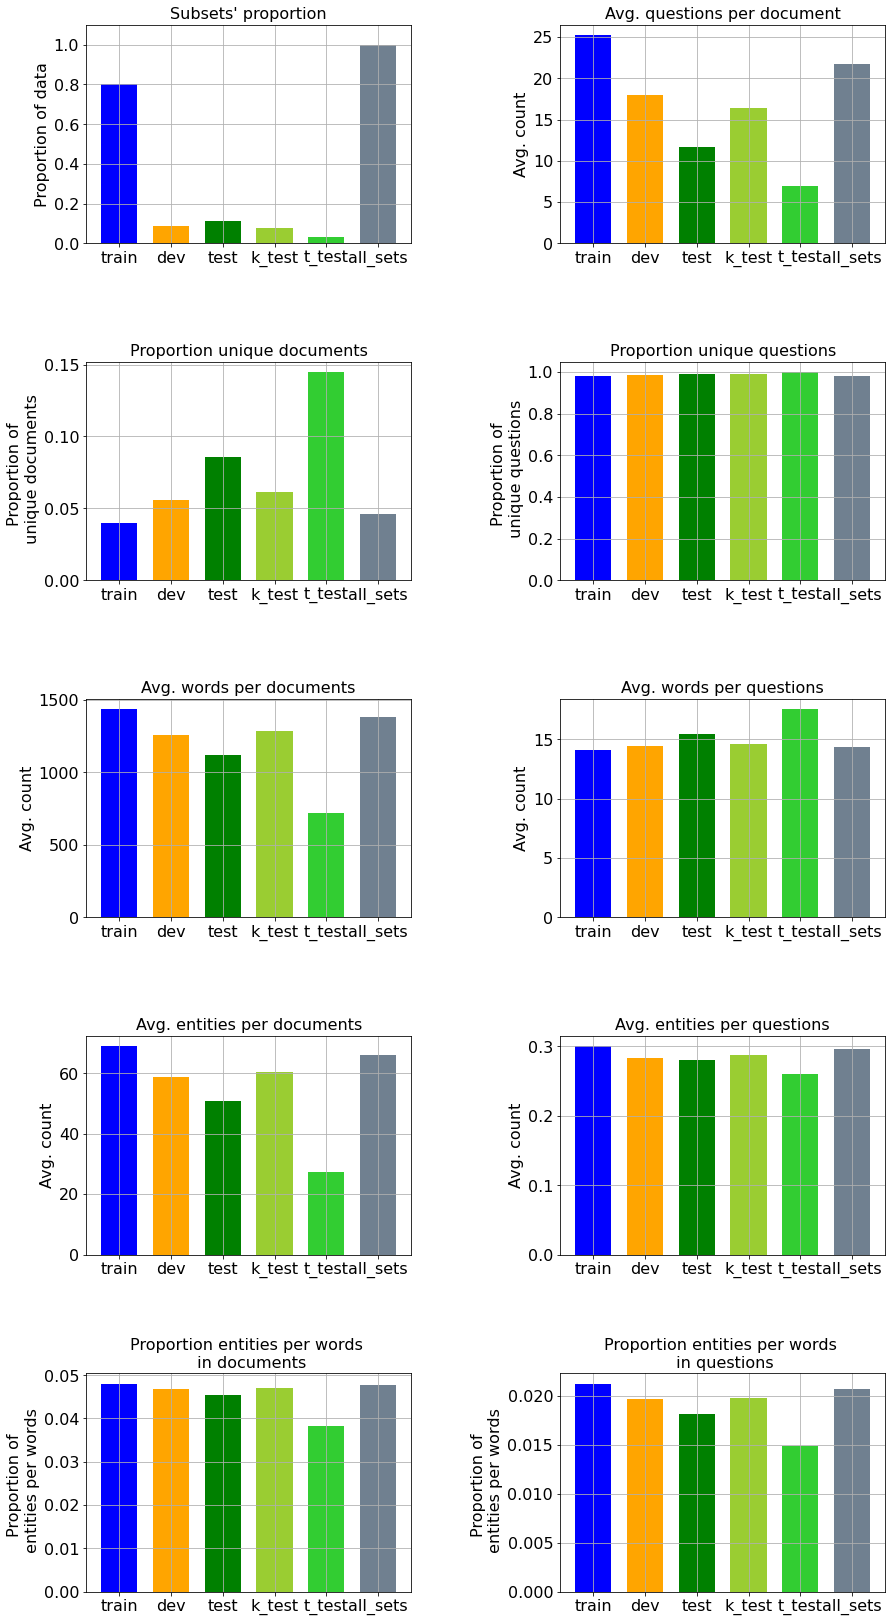

In [30]:
fig, axs = plt.subplots(5, 2, figsize = (14,24), sharex=False, sharey=False)
colors = ['blue', 'orange', 'green', 'yellowgreen', 'limegreen', 'slategrey']
# plots
axs[0, 0].bar(df['set'], height=df['prop_set'], color = colors, width=0.7)
axs[0, 1].bar(df['set'], height=df['avg_tgt_para'], color = colors, width=0.7)
axs[1, 0].bar(df['set'], height=df['prop_unique_para'], color = colors, width=0.7)
axs[1, 1].bar(df['set'], height=df['prop_unique_tgt'], color = colors, width=0.7)
axs[2, 0].bar(df['set'], height=df['avg_words_para'], color = colors, width=0.7)
axs[2, 1].bar(df['set'], height=df['avg_words_tgt'], color = colors, width=0.7)
axs[3, 0].bar(df['set'], height=df['avg_ents_para'], color = colors, width=0.7)
axs[3, 1].bar(df['set'], height=df['avg_ents_tgt'], color = colors, width=0.7)
axs[4, 0].bar(df['set'], height=df['prop_ents_words_para'], color = colors, width=0.7)
axs[4, 1].bar(df['set'], height=df['prop_ents_words_tgt'], color = colors, width=0.7)
# setting title
axs[0, 0].set_title("Subsets' proportion", fontsize = 16)
axs[0, 1].set_title('Avg. questions per document', fontsize = 16)
axs[1, 0].set_title('Proportion unique documents', fontsize = 16)
axs[1, 1].set_title('Proportion unique questions', fontsize = 16)
axs[2, 0].set_title('Avg. words per documents', fontsize = 16)
axs[2, 1].set_title('Avg. words per questions', fontsize = 16)
axs[3, 0].set_title('Avg. entities per documents', fontsize = 16)
axs[3, 1].set_title('Avg. entities per questions', fontsize = 16)
axs[4, 0].set_title('Proportion entities per words \n in documents', fontsize = 16)
axs[4, 1].set_title('Proportion entities per words \n in questions', fontsize = 16)
# grid
axs[0, 0].grid(True)
axs[0, 1].grid(True)
axs[1, 0].grid(True)
axs[1, 1].grid(True)
axs[2, 0].grid(True)
axs[2, 1].grid(True)
axs[3, 0].grid(True)
axs[3, 1].grid(True)
axs[4, 0].grid(True)
axs[4, 1].grid(True)
# value of x axis: size
axs[0, 0].tick_params(axis='x', labelsize=16)
axs[0, 1].tick_params(axis='x', labelsize=16)
axs[1, 0].tick_params(axis='x', labelsize=16)
axs[1, 1].tick_params(axis='x', labelsize=16)
axs[2, 0].tick_params(axis='x', labelsize=16)
axs[2, 1].tick_params(axis='x', labelsize=16)
axs[3, 0].tick_params(axis='x', labelsize=16)
axs[3, 1].tick_params(axis='x', labelsize=16)
axs[4, 0].tick_params(axis='x', labelsize=16)
axs[4, 1].tick_params(axis='x', labelsize=16)
# value of y axis: size
axs[0, 0].tick_params(axis='y', labelsize=16)
axs[0, 1].tick_params(axis='y', labelsize=16)
axs[1, 0].tick_params(axis='y', labelsize=16)
axs[1, 1].tick_params(axis='y', labelsize=16)
axs[2, 0].tick_params(axis='y', labelsize=16)
axs[2, 1].tick_params(axis='y', labelsize=16)
axs[3, 0].tick_params(axis='y', labelsize=16)
axs[3, 1].tick_params(axis='y', labelsize=16)
axs[4, 0].tick_params(axis='y', labelsize=16)
axs[4, 1].tick_params(axis='y', labelsize=16)
# writing y label and size
axs[0, 0].set_ylabel('Proportion of data', fontsize=16)
axs[0, 1].set_ylabel('Avg. count', fontsize=16)
axs[1, 0].set_ylabel('Proportion of \n unique documents', fontsize=16)
axs[1, 1].set_ylabel('Proportion of \n unique questions', fontsize=16)
axs[2, 0].set_ylabel('Avg. count', fontsize=16)
axs[2, 1].set_ylabel('Avg. count', fontsize=16)
axs[3, 0].set_ylabel('Avg. count', fontsize=16)
axs[3, 1].set_ylabel('Avg. count', fontsize=16)
axs[4, 0].set_ylabel('Proportion of \n entities per words', fontsize=16)
axs[4, 1].set_ylabel('Proportion of \n entities per words', fontsize=16)
# adjusting the y lim
axs[0, 0].set_ylim([0,1.1])
# axs[0, 1]
# axs[1, 0]
# axs[1, 1]
# axs[2, 0]
# axs[2, 1]
# axs[3, 0]
# axs[3, 1]
# plt.gcf().autofmt_xdate() 
fig.tight_layout(pad=6.0)
fig.suptitle = ('Descriptive features of the dataset') # it doesn't appeard because of the tight_layout feature
plt.savefig('descript-features-allsets.png', bbox_inches='tight')
plt.show()

In [31]:
df = descriptive_[descriptive_.set != 'all_sets']

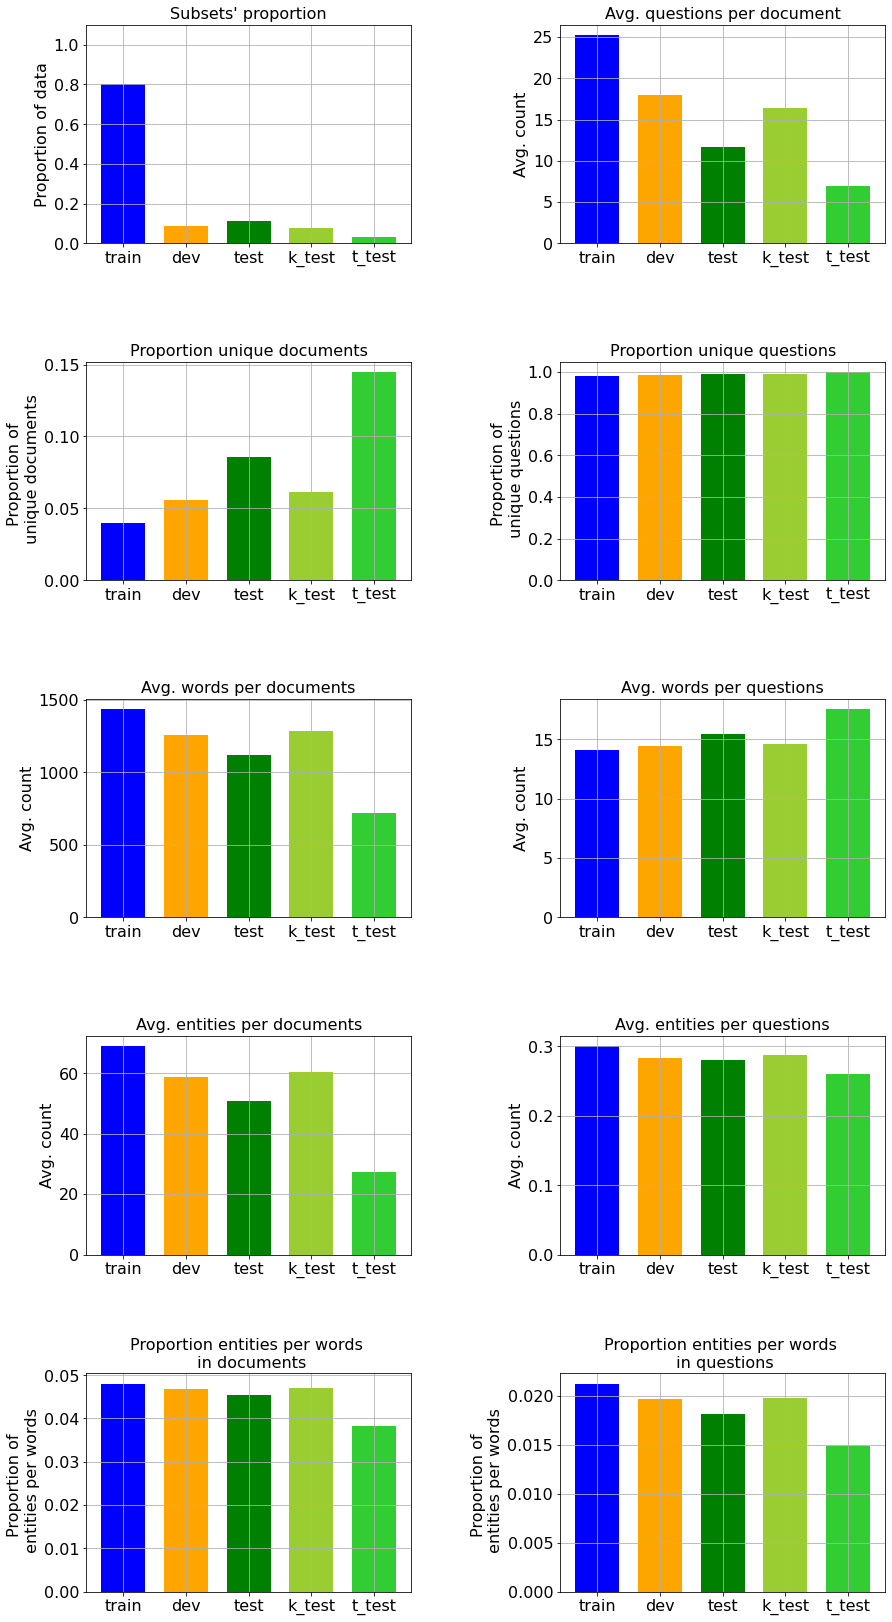

In [32]:
fig, axs = plt.subplots(5, 2, figsize = (14,24), sharex=False, sharey=False)
colors = ['blue', 'orange', 'green', 'yellowgreen', 'limegreen', 'slategrey']
# plots
axs[0, 0].bar(df['set'], height=df['prop_set'], color = colors, width=0.7)
axs[0, 1].bar(df['set'], height=df['avg_tgt_para'], color = colors, width=0.7)
axs[1, 0].bar(df['set'], height=df['prop_unique_para'], color = colors, width=0.7)
axs[1, 1].bar(df['set'], height=df['prop_unique_tgt'], color = colors, width=0.7)
axs[2, 0].bar(df['set'], height=df['avg_words_para'], color = colors, width=0.7)
axs[2, 1].bar(df['set'], height=df['avg_words_tgt'], color = colors, width=0.7)
axs[3, 0].bar(df['set'], height=df['avg_ents_para'], color = colors, width=0.7)
axs[3, 1].bar(df['set'], height=df['avg_ents_tgt'], color = colors, width=0.7)
axs[4, 0].bar(df['set'], height=df['prop_ents_words_para'], color = colors, width=0.7)
axs[4, 1].bar(df['set'], height=df['prop_ents_words_tgt'], color = colors, width=0.7)
# setting title
axs[0, 0].set_title("Subsets' proportion", fontsize = 16)
axs[0, 1].set_title('Avg. questions per document', fontsize = 16)
axs[1, 0].set_title('Proportion unique documents', fontsize = 16)
axs[1, 1].set_title('Proportion unique questions', fontsize = 16)
axs[2, 0].set_title('Avg. words per documents', fontsize = 16)
axs[2, 1].set_title('Avg. words per questions', fontsize = 16)
axs[3, 0].set_title('Avg. entities per documents', fontsize = 16)
axs[3, 1].set_title('Avg. entities per questions', fontsize = 16)
axs[4, 0].set_title('Proportion entities per words \n in documents', fontsize = 16)
axs[4, 1].set_title('Proportion entities per words \n in questions', fontsize = 16)
# grid
axs[0, 0].grid(True)
axs[0, 1].grid(True)
axs[1, 0].grid(True)
axs[1, 1].grid(True)
axs[2, 0].grid(True)
axs[2, 1].grid(True)
axs[3, 0].grid(True)
axs[3, 1].grid(True)
axs[4, 0].grid(True)
axs[4, 1].grid(True)
# value of x axis: size
axs[0, 0].tick_params(axis='x', labelsize=16)
axs[0, 1].tick_params(axis='x', labelsize=16)
axs[1, 0].tick_params(axis='x', labelsize=16)
axs[1, 1].tick_params(axis='x', labelsize=16)
axs[2, 0].tick_params(axis='x', labelsize=16)
axs[2, 1].tick_params(axis='x', labelsize=16)
axs[3, 0].tick_params(axis='x', labelsize=16)
axs[3, 1].tick_params(axis='x', labelsize=16)
axs[4, 0].tick_params(axis='x', labelsize=16)
axs[4, 1].tick_params(axis='x', labelsize=16)
# value of y axis: size
axs[0, 0].tick_params(axis='y', labelsize=16)
axs[0, 1].tick_params(axis='y', labelsize=16)
axs[1, 0].tick_params(axis='y', labelsize=16)
axs[1, 1].tick_params(axis='y', labelsize=16)
axs[2, 0].tick_params(axis='y', labelsize=16)
axs[2, 1].tick_params(axis='y', labelsize=16)
axs[3, 0].tick_params(axis='y', labelsize=16)
axs[3, 1].tick_params(axis='y', labelsize=16)
axs[4, 0].tick_params(axis='y', labelsize=16)
axs[4, 1].tick_params(axis='y', labelsize=16)
# writing y label and size
axs[0, 0].set_ylabel('Proportion of data', fontsize=16)
axs[0, 1].set_ylabel('Avg. count', fontsize=16)
axs[1, 0].set_ylabel('Proportion of \n unique documents', fontsize=16)
axs[1, 1].set_ylabel('Proportion of \n unique questions', fontsize=16)
axs[2, 0].set_ylabel('Avg. count', fontsize=16)
axs[2, 1].set_ylabel('Avg. count', fontsize=16)
axs[3, 0].set_ylabel('Avg. count', fontsize=16)
axs[3, 1].set_ylabel('Avg. count', fontsize=16)
axs[4, 0].set_ylabel('Proportion of \n entities per words', fontsize=16)
axs[4, 1].set_ylabel('Proportion of \n entities per words', fontsize=16)
# adjusting the y lim
axs[0, 0].set_ylim([0,1.1])
# axs[0, 1]
# axs[1, 0]
# axs[1, 1]
# axs[2, 0]
# axs[2, 1]
# axs[3, 0]
# axs[3, 1]
# plt.gcf().autofmt_xdate() 
fig.tight_layout(pad=6.0)
fig.suptitle = ('Descriptive features of the dataset') # it doesn't appeard because of the tight_layout feature
plt.savefig('descript-features.png', bbox_inches='tight')
plt.show()

# Most frequent terms

- report most frequent terms after stopwords removal
- top starting words of questions

In [2]:
import numpy as np
import pandas as pd
from zipfile import ZipFile
import json
from collections import defaultdict
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')                 # stopwords
import spacy
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to /homes/do338/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
words_count = defaultdict(lambda: defaultdict(lambda: 0)) # [para-train][token.text] = x times
starting_words_tgt = defaultdict(lambda: defaultdict(lambda: 0)) # [tgt-train][first_word] = x times

for key in data.keys():
    if 'src' not in key: # I don't want to analyse target sentences right now
        print(key)
        for m in range(len(data[key])):
            doc = nlp(data[key][m])
            for i, token in enumerate(doc):
                # counting all the words in each subset
                if token.is_stop==False and token.is_alpha==True:
                    words_count[key][token.text] += 1
                # counting only the first words in the tgt ## filtering prepositions (ADP) and definite articles ('DET')
                if 'tgt' in key and i==0: # and token.pos_!= 'DET' and token.pos_!='ADP':
                    starting_words_tgt[key][token.text] += 1        

t-para-test
t-tgt-test
para-train
para-dev
tgt-dev
k-para-test
k-tgt-test
tgt-train


In [4]:
with open('LearningQdata.txt') as json_file:
    data = json.load(json_file)

In [7]:
# words_count = defaultdict(lambda: defaultdict(lambda: 0)) # [para-train][token.text] = x times
starting_words_tgt2 = defaultdict(lambda: defaultdict(lambda: 0)) # [tgt-train][first_word] = x times

for key in data.keys():
    if 'tgt' in key: # I don't want to analyse target sentences right now
        print(key)
        for m in range(len(data[key])):
            doc = nlp(data[key][m])
            print()
            token = doc[0]
            print(token)
            print(token.pos_)
#             for i, token in enumerate(doc):
#                 # counting all the words in each subset
# #                 if token.is_stop==False and token.is_alpha==True:
# #                     words_count[key][token.text] += 1
#                 # counting only the first words in the tgt filtering prepositions (ADP) and definite articles ('DET')
#             if token.pos_!= 'DET' and token.pos_!='ADP':
#                 starting_words_tgt2[key][token.text] += 1    
# Prep and DET a this those

t-tgt-test

kepler-78b
PROPN

why
ADV

what
PRON

a
DET

this
DET

this
DET

the
DET

some
DET

in
ADP

it
PRON

give
VERB

what
DET

the
DET

explain
VERB

how
ADV

what
PRON

the
DET

most
ADJ

what
PRON

why
ADV

what
PRON

what
PRON

what
PRON

when
ADV

considering
VERB

how
ADV

consider
VERB

read
VERB

silently
ADV

social
ADJ

of
ADP

brain
NOUN

one
NUM

in
ADP

describe
VERB

which
DET

which
DET

how
ADV

according
VERB

what
DET

the
DET

what
PRON

what
PRON

blue
ADJ

what
DET

what
PRON

briefly
ADV

what
PRON

what
PRON

what
PRON

what
PRON

what
PRON

how
ADV

describe
VERB

what
PRON

what
PRON

meeting
VERB

when
ADV

what
PRON

when
ADV

after
ADP

i
PRON

interviewing
VERB

what
PRON

what
PRON

the
DET

which
DET

if
SCONJ

what
PRON

think
VERB

the
DET

when
ADV

our
DET

what
PRON

who
PRON

why
ADV

why
ADV

what
PRON

can
VERB

what
PRON

the
DET

why
ADV

contrast
VERB

what
DET

the
DET

the
DET

the
DET

gothic
ADJ

the
DET

the
DET

why
ADV

the
DET

gr

KeyboardInterrupt: 

In [57]:
# saving dictionaries
with open('words_count.txt', 'w') as outfile:
    json.dump(words_count, outfile)
with open('starting_words_tgt.txt', 'w') as outfile:
    json.dump(starting_words_tgt, outfile)

In [122]:
# initializing dictionary
test_dict = starting_words_tgt

# Sort Nested keys by Value
# Using sorted() + generator expression + lamda
sorted_starting_words_tgt = {key : dict(sorted(val.items(), key = lambda ele: ele[1], reverse=True))
       for key, val in test_dict.items()}

In [155]:
# printing result 
dic = sorted_starting_words_tgt
print()
print('@@@@@@@@@@ WORDS IN QUESTIONS @@@@@@@@@@@')
print('@@@@@@@@ TOP 20 STARTING WORDS @@@@@@@@@')
print()
print(f"{'Ranking':<15}{'Train':<10}{'Times':<15}{'Dev':<10}{'Times':<15}{'Khan Test':<10}{'Times':<15}{'Teded Test':<10}{'Times':<15}")
print()
count = 0
for key1, key2, key3, key4 in zip(dic['tgt-train'].keys(), dic['tgt-dev'].keys(), dic['k-tgt-test'].keys(), dic['t-tgt-test'].keys()):
    if count < 21:
        print(f"{count:<15}{key1:<10}{dic['tgt-train'][key1]:<15}{key2:<10}{dic['tgt-dev'][key2]:<15}{key3:<10}{dic['k-tgt-test'][key3]:<15}{key4:<10}{dic['t-tgt-test'][key4]:<15}")
        count += 1


@@@@@@@@@@ WORDS IN QUESTIONS @@@@@@@@@@@
@@@@@@@@ TOP 20 STARTING WORDS @@@@@@@@@

Ranking        Train     Times          Dev       Times          Khan Test Times          Teded TestTimes          

0              what      28442          what      3197           what      2742           what      1514           
1              how       26548          how       2737           how       2369           the       610            
2              why       18705          why       2001           why       1705           which     593            
3              is        14591          is        1688           is        1453           how       526            
4              at        10584          if        943            so        839            why       450            
5              if        8737           at        907            at        806            in        289            
6              so        8281           so        887            if        771            when      17

In [156]:
# initializing dictionary
test_dict = words_count

# Sort Nested keys by Value
# Using sorted() + generator expression + lamda
sorted_words_count = {key : dict(sorted(val.items(), key = lambda ele: ele[1], reverse=True))
       for key, val in test_dict.items()}

In [157]:
# printing result 
dic = sorted_words_count
print()
print('@@@@@@@@@@ WORDS IN DOCUMENTS @@@@@@@@@@@')
print('@@@@@@@@ TOP 20 MOST FREQUENT WORDS @@@@@@@@@')
print()
print(f"{'Ranking':<15}{'Train':<10}{'Times':<15}{'Dev':<10}{'Times':<15}{'Khan Test':<10}{'Times':<15}{'Teded Test':<10}{'Times':<15}")
print()
count = 0
for key1, key2, key3, key4 in zip(dic['para-train'].keys(), dic['para-dev'].keys(), dic['k-para-test'].keys(), dic['t-para-test'].keys()):
    if count < 21:
        print(f"{count:<15}{key1:<10}{dic['para-train'][key1]:<15}{key2:<10}{dic['para-dev'][key2]:<15}{key3:<10}{dic['k-para-test'][key3]:<15}{key4:<10}{dic['t-para-test'][key4]:<15}")
        count += 1

print()
print('@@@@@@@@@@ WORDS IN QUESTIONS @@@@@@@@@@@')
print('@@@@@@@@ TOP 20 MOST FREQUENT WORDS @@@@@@@@@')
print()
print(f"{'Ranking':<15}{'Train':<10}{'Times':<15}{'Dev':<10}{'Times':<15}{'Khan Test':<10}{'Times':<15}{'Teded Test':<10}{'Times':<15}")
print()
count = 0
for key1, key2, key3, key4 in zip(dic['tgt-train'].keys(), dic['tgt-dev'].keys(), dic['k-tgt-test'].keys(), dic['t-tgt-test'].keys()):
    if count < 21:
        print(f"{count:<15}{key1:<10}{dic['tgt-train'][key1]:<15}{key2:<10}{dic['tgt-dev'][key2]:<15}{key3:<10}{dic['k-tgt-test'][key3]:<15}{key4:<10}{dic['t-tgt-test'][key4]:<15}")
        count += 1


@@@@@@@@@@ WORDS IN DOCUMENTS @@@@@@@@@@@
@@@@@@@@ TOP 20 MOST FREQUENT WORDS @@@@@@@@@

Ranking        Train     Times          Dev       Times          Khan Test Times          Teded TestTimes          

0              let       1827970        going     143828         going     133896         like      22748          
1              going     1792577        let       139092         let       129501         people    12343          
2              right     1540128        right     111054         right     114165         time      11502          
3              times     1064225        like      85855          like      75155          know      8667           
4              equal     1035788        actually  69351          actually  66591          called    7984           
5              x         1005441        times     53894          think     50960          world     7947           
6              like      908585         know      52361          m         49871          way    